In [1]:
import os
import math
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

In [2]:
alphas = [0.01, 0.001, 0.0001, 1e-05, 1e-06, 0.0]
betas = [0.01, 0.001, 0.0001, 1e-05, 1e-06, 0.0]
criterion = 'l2-sp'
dataset_directory = '/cluster/tufts/hugheslab/eharve06/CIFAR-10'
experiments_directory = '/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/tuned_CIFAR-10'
lr_0s = [0.1, 0.01, 0.001, 0.0001]
ns = [100, 1000, 10000, 50000]
random_states = [1001]

columns = ['alpha', 'beta', 'criterion', 'model_name', 'n', 'random_state', 'val_acc', 'val_nll']
tuned_df = pd.DataFrame(columns=columns)

for alpha, beta, lr_0, n, random_state in itertools.product(alphas, betas, lr_0s, ns, random_states):
    model_name = f'{criterion}_alpha={alpha}_beta={beta}_lr_0={lr_0}_n={n}_random_state={random_state}'
    temp_df = pd.read_csv(f'{experiments_directory}/{model_name}.csv')
    row = [alpha, beta, criterion, model_name, n, random_state, temp_df.val_or_test_acc.values[-1], temp_df.val_or_test_nll.values[-1]]
    tuned_df.loc[len(tuned_df)] = row
    
min_indices = tuned_df.groupby(['alpha', 'beta', 'criterion', 'n', 'random_state'])['val_nll'].idxmin()
tuned_df = tuned_df.loc[min_indices]

experiments_directory = '/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10'

columns = ['alpha', 'beta', 'criterion', 'model_name', 'n', 'random_state', 'test_acc', 'test_nll']
retrained_df = pd.DataFrame(columns=columns)

for index, row in tuned_df.iterrows():
    if os.path.exists(f'{experiments_directory}/{row.model_name}.csv'):
        temp_df = pd.read_csv(f'{experiments_directory}/{row.model_name}.csv')
        row = [row.alpha, row.beta, row.criterion, row.model_name, row.n, row.random_state, temp_df.val_or_test_acc.values[-1], temp_df.val_or_test_nll.values[-1]]
        retrained_df.loc[len(retrained_df)] = row

retrained_df

,alpha,beta,criterion,model_name,n,random_state,test_acc,test_nll
0,0.00,0.000000,l2-sp,l2-sp_alpha=0.0_beta=0.0_lr_0=0.001_n=100_rand...,100,1001,0.6889,0.945300
1,0.00,0.000000,l2-sp,l2-sp_alpha=0.0_beta=0.0_lr_0=0.001_n=1000_ran...,1000,1001,0.8805,0.395653
2,0.00,0.000000,l2-sp,l2-sp_alpha=0.0_beta=0.0_lr_0=0.001_n=10000_ra...,10000,1001,0.9354,0.199848
3,0.00,0.000000,l2-sp,l2-sp_alpha=0.0_beta=0.0_lr_0=0.01_n=50000_ran...,50000,1001,0.9693,0.123190
4,0.00,0.000001,l2-sp,l2-sp_alpha=0.0_beta=1e-06_lr_0=0.001_n=100_ra...,100,1001,0.6851,0.948631
...,...,...,...,...,...,...,...,...
139,0.01,0.001000,l2-sp,l2-sp_alpha=0.01_beta=0.001_lr_0=0.1_n=50000_r...,50000,1001,0.9681,0.099344
140,0.01,0.010000,l2-sp,l2-sp_alpha=0.01_beta=0.01_lr_0=0.001_n=100_ra...,100,1001,0.6898,0.927939
141,0.01,0.010000,l2-sp,l2-sp_alpha=0.01_beta=0.01_lr_0=0.1_n=1000_ran...,1000,1001,0.8842,0.384104
142,0.01,0.010000,l2-sp,l2-sp_alpha=0.01_beta=0.01_lr_0=0.1_n=10000_ra...,10000,1001,0.9517,0.159679


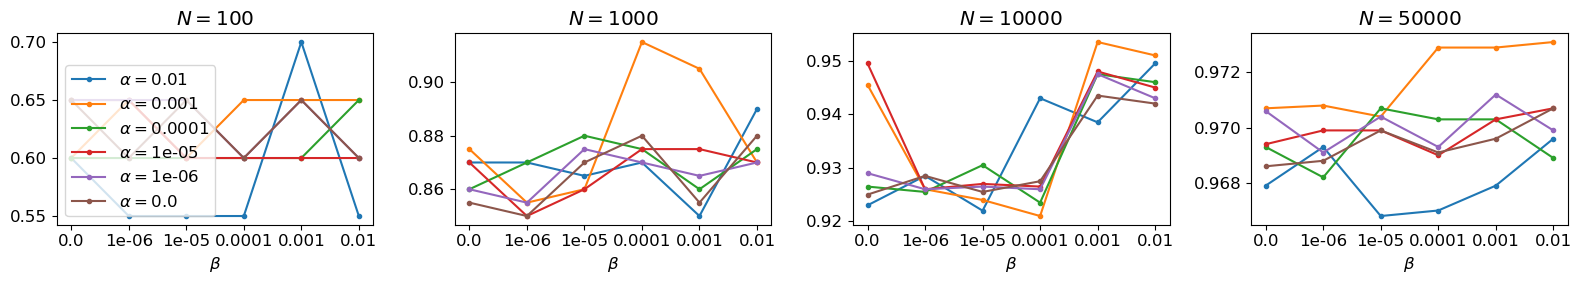

In [3]:
ncols, nrows = 4, 1
fig, axs = plt.subplots(figsize=(4*ncols, 3*nrows), ncols=ncols, nrows=nrows)
for i, n in enumerate(ns):
    for alpha in alphas:
        axs[i].plot(tuned_df[(tuned_df.n==n)&(tuned_df.alpha==alpha)].beta.astype(str), tuned_df[(tuned_df.n==n)&(tuned_df.alpha==alpha)].val_acc, label=rf'$\alpha=${alpha}', ls='-', marker='.')
    axs[i].set_title(rf'$N={n}$')
    axs[i].set_xlabel(r'$\beta$')
axs[0].legend(loc='lower left')
fig.tight_layout()
plt.show()

In [4]:
criterion = 'l2-sp'
dataset_directory = '/cluster/tufts/hugheslab/eharve06/CIFAR-10'
experiments_directory = '/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_VI'
lr_0s = [0.1, 0.01, 0.001, 0.0001]
ns = [100, 1000, 10000, 50000]
random_states = [1001]

columns = ['criterion', 'lambda_star', 'model_name', 'n', 'random_state', 'tau_star', 'train_loss', 'test_acc', 'test_nll']
retrained_df = pd.DataFrame(columns=columns)

for lr_0, n, random_state in itertools.product(lr_0s, ns, random_states):
    model_name = f'{criterion}_kappa={23528522/n}_lr_0={lr_0}_n={n}_random_state={random_state}'
    temp_df = pd.read_csv(f'{experiments_directory}/{model_name}.csv')
    row = [criterion, temp_df.lambda_star.values[-1], model_name, n, random_state, temp_df.tau_star.values[-1], temp_df.train_loss.values[-1], temp_df.val_or_test_acc.values[-1], temp_df.val_or_test_nll.values[-1]]
    retrained_df.loc[len(retrained_df)] = row
    
min_indices = retrained_df.groupby(['criterion', 'n', 'random_state'])['train_loss'].idxmin()
retrained_df = retrained_df.loc[min_indices]

retrained_df

,criterion,lambda_star,model_name,n,random_state,tau_star,train_loss,test_acc,test_nll
8,l2-sp,4.502336e-06,l2-sp_kappa=235285.22_lr_0=0.001_n=100_random_...,100,1001,0.00059,1.241041e+05,0.7014,0.959640
9,l2-sp,7.367992e-07,l2-sp_kappa=23528.522_lr_0=0.001_n=1000_random...,1000,1001,0.00043,8.081569e+05,0.8739,0.388796
6,l2-sp,6.603785e-05,l2-sp_kappa=2352.8522_lr_0=0.01_n=10000_random...,10000,1001,0.00078,3.185813e+06,0.9520,0.265158
7,l2-sp,3.011050e-05,l2-sp_kappa=470.57044_lr_0=0.01_n=50000_random...,50000,1001,0.00064,1.335702e+06,0.9668,0.118539


In [5]:
retrained_df['alpha'] = 1/(retrained_df['n']*retrained_df['lambda_star'])
retrained_df['beta'] = 1/(retrained_df['n']*retrained_df['tau_star'])
retrained_df

,criterion,lambda_star,model_name,n,random_state,tau_star,train_loss,test_acc,test_nll,alpha,beta
8,l2-sp,4.502336e-06,l2-sp_kappa=235285.22_lr_0=0.001_n=100_random_...,100,1001,0.00059,1.241041e+05,0.7014,0.959640,2221.069144,16.947092
9,l2-sp,7.367992e-07,l2-sp_kappa=23528.522_lr_0=0.001_n=1000_random...,1000,1001,0.00043,8.081569e+05,0.8739,0.388796,1357.221845,2.326324
6,l2-sp,6.603785e-05,l2-sp_kappa=2352.8522_lr_0=0.01_n=10000_random...,10000,1001,0.00078,3.185813e+06,0.9520,0.265158,1.514283,0.128175
7,l2-sp,3.011050e-05,l2-sp_kappa=470.57044_lr_0=0.01_n=50000_random...,50000,1001,0.00064,1.335702e+06,0.9668,0.118539,0.664220,0.031245
